# Modeling and Simulation in Python

Chapter 10

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

from pandas import read_html

### Under the hood

To get a `DataFrame` and a `Series`, I'll read the world population data and select a column.

`DataFrame` and `Series` contain a variable called `shape` that indicates the number of rows and columns.

In [2]:
filename = 'data/World_population_estimates.html'
html_link = 'https://en.wikipedia.org/wiki/Estimates_of_historical_world_population'
tables = read_html(html_link, header=0, index_col=0, decimal='M')
table2 = tables[2]
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']
table2.shape

(67, 11)

In [3]:
census = table2.census / 1e9
census.shape

(67,)

In [4]:
un = table2.un / 1e9
un.shape

(67,)

A `DataFrame` contains `index`, which labels the rows.  It is an `Int64Index`, which is similar to a NumPy array.

In [5]:
table2.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

And `columns`, which labels the columns.

In [6]:
table2.columns

Index(['census', 'prb', 'un', 'maddison', 'hyde', 'tanton', 'biraben', 'mj',
       'thomlinson', 'durand', 'clark'],
      dtype='object')

And `values`, which is an array of values.

In [7]:
table2.values

array([[2557628654, 2516000000.0, 2525149000.0, 2544000000.0,
        2527960000.0, 2400000000.0, 2527000000.0, 2500000000.0,
        2400000000.0, nan, 2486000000.0],
       [2594939877, nan, 2572850917.0, 2571663000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2636772306, nan, 2619292068.0, 2617949000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2682053389, nan, 2665865392.0, 2665959000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2730228104, nan, 2713172027.0, 2716927000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2782098943, nan, 2761650981.0, 2769074000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2835299673, nan, 2811572031.0, 2822502000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2891349717, nan, 2863042795.0, 2879934000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [2948137248, nan, 2916030167.0, 2939254000.0, nan, nan, nan, nan,
        nan, nan, nan],
       [3000716593, nan, 2970395814.0, 2995909000.0, nan

A `Series` does not have `columns`, but it does have `name`.

In [8]:
census.name

'census'

It contains `values`, which is an array.

In [9]:
census.values

array([2.55762865, 2.59493988, 2.63677231, 2.68205339, 2.7302281 ,
       2.78209894, 2.83529967, 2.89134972, 2.94813725, 3.00071659,
       3.04300151, 3.08396693, 3.14009322, 3.20982788, 3.28120131,
       3.35042579, 3.42067792, 3.49033371, 3.56231382, 3.63715905,
       3.71269774, 3.79032695, 3.86656865, 3.94209644, 4.01660881,
       4.08908323, 4.16018501, 4.23208458, 4.30410575, 4.37901394,
       4.45136274, 4.53441012, 4.61456656, 4.69573674, 4.77456939,
       4.8564627 , 4.94057123, 5.02720049, 5.11455717, 5.20144011,
       5.28895593, 5.37158592, 5.45613628, 5.53826832, 5.61868213,
       5.69920299, 5.77944059, 5.85797254, 5.93521325, 6.01207492,
       6.08857138, 6.16521925, 6.24201635, 6.31859096, 6.39569951,
       6.47304473, 6.55126353, 6.62991376, 6.70904978, 6.78821439,
       6.85858475, 6.93599949, 7.01387131, 7.09212809, 7.16996819,
       7.24789279, 7.32599671])

And it contains `index`:

In [10]:
census.index

Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016],
           dtype='int64', name='Year')

If you ever wonder what kind of object a variable refers to, you can use the `type` function.  The result indicates what type the object is, and the module where that type is defined.

`DataFrame`, `Int64Index`, `Index`, and `Series` are defined by Pandas.

`ndarray` is defined by NumPy.

In [11]:
type(table2)

pandas.core.frame.DataFrame

In [12]:
type(table2.index)

pandas.core.indexes.numeric.Int64Index

In [13]:
type(table2.columns)

pandas.core.indexes.base.Index

In [14]:
type(table2.values)

numpy.ndarray

In [15]:
type(census)

pandas.core.series.Series

In [16]:
type(census.index)

pandas.core.indexes.numeric.Int64Index

In [17]:
type(census.values)

numpy.ndarray

## Optional exercise

The following exercise provides a chance to practice what you have learned so far, and maybe develop a different growth model.  If you feel comfortable with what we have done so far, you might want to give it a try.

**Optional Exercise:** On the Wikipedia page about world population estimates, the first table contains estimates for prehistoric populations.  The following cells process this table and plot some of the results.

In [18]:
filename = 'data/World_population_estimates.html'
html_link = 'https://en.wikipedia.org/wiki/Estimates_of_historical_world_population'
tables = read_html(html_link, header=0, index_col=0, decimal='M')
len(tables)

6

Select `tables[1]`, which is the second table on the page.

In [19]:
table1 = tables[1]
table1.head()

,PRB (1973–2016)[15],UN (2015)[16],Maddison (2008)[17],HYDE (2010)[18],Tanton (1994)[19],Biraben (1980)[20],McEvedy & Jones (1978)[21],Thomlinson (1975)[22],Durand (1974)[23],Clark (1967)[24]
Year,,,,,,,,,,
−10000,NaN,NaN,NaN,2M[25],NaN,NaN,4.0,1–10M,NaN,NaN
−9000,NaN,NaN,NaN,4.,NaN,NaN,NaN,NaN,NaN,NaN
−8000,5.,NaN,NaN,5.,NaN,NaN,NaN,NaN,5–10M,NaN
−7000,NaN,NaN,NaN,8.,NaN,NaN,NaN,NaN,NaN,NaN
−6000,NaN,NaN,NaN,11.,NaN,NaN,NaN,NaN,NaN,NaN


Not all agencies and researchers provided estimates for the same dates.  Again `NaN` is the special value that indicates missing data.

In [20]:
table1.tail()

,PRB (1973–2016)[15],UN (2015)[16],Maddison (2008)[17],HYDE (2010)[18],Tanton (1994)[19],Biraben (1980)[20],McEvedy & Jones (1978)[21],Thomlinson (1975)[22],Durand (1974)[23],Clark (1967)[24]
Year,,,,,,,,,,
1913,NaN,NaN,1793.,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1920,NaN,1860.0,1863.,1912.,NaN,NaN,NaN,NaN,NaN,1968.
1925,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
1930,NaN,2070.0,NaN,2092.,NaN,NaN,NaN,NaN,NaN,2145.
1940,NaN,2300.0,2299.,2307.,NaN,NaN,NaN,NaN,NaN,2340.


Again, we'll replace the long column names with more convenient abbreviations.

In [21]:
table1.columns = ['PRB', 'UN', 'Maddison', 'HYDE', 'Tanton', 
                  'Biraben', 'McEvedy & Jones', 'Thomlinson', 'Durand', 'Clark']

Some of the estimates are in a form Pandas doesn't recognize as numbers, but we can coerce them to be numeric.

In [22]:
for col in table1.columns:
    table1[col] = pd.to_numeric(table1[col], errors='coerce')

Here are the results.  Notice that we are working in millions now, not billions.

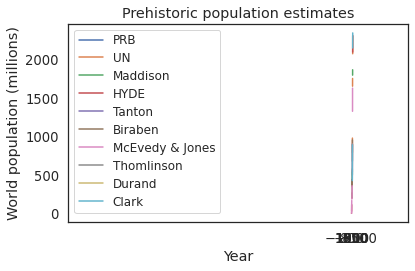

In [23]:
table1.plot()
decorate(xlim=[-10000, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='Prehistoric population estimates')
plt.legend(fontsize='small');

We can use `xlim` to zoom in on everything after Year 0.

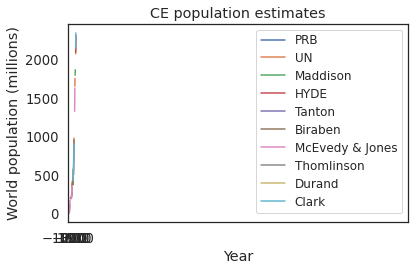

In [24]:
table1.plot()
decorate(xlim=[0, 2000], xlabel='Year', 
         ylabel='World population (millions)',
         title='CE population estimates',
        legend=None)
plt.legend(fontsize='small');

See if you can find a model that fits these data well from Year 0 to 1950.

How well does your best model predict actual population growth from 1950 to the present?

In [25]:
df = table1.iloc[11:]

,PRB,UN,Maddison,HYDE,Tanton,Biraben,McEvedy & Jones,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1,NaN,300.0,NaN,NaN,150.0,255.0,170.0,200.0,NaN,NaN
100,NaN,NaN,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,202.0,NaN,256.0,190.0,NaN,NaN,NaN
300,NaN,NaN,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0
400,NaN,NaN,NaN,209.0,NaN,206.0,190.0,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN,206.0,190.0,NaN,NaN,NaN
600,NaN,NaN,NaN,213.0,NaN,206.0,200.0,NaN,NaN,237.0
700,NaN,NaN,NaN,226.0,NaN,207.0,210.0,NaN,NaN,NaN


In [26]:
df.head()

,PRB,UN,Maddison,HYDE,Tanton,Biraben,McEvedy & Jones,Thomlinson,Durand,Clark
Year,,,,,,,,,,
1,NaN,300.0,NaN,NaN,150.0,255.0,170.0,200.0,NaN,NaN
100,NaN,NaN,NaN,195.0,NaN,NaN,NaN,NaN,NaN,NaN
200,NaN,NaN,NaN,202.0,NaN,256.0,190.0,NaN,NaN,NaN
300,NaN,NaN,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN
350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,254.0


/home/kenan/anaconda3/envs/pyt/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Year'>

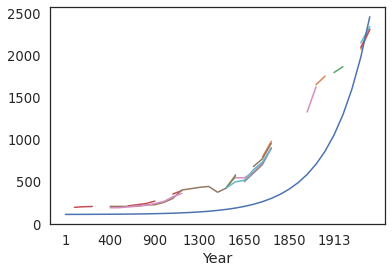

In [27]:
xs = linspace(1, 1940, 35)
ys = 110 + np.exp(0.004*xs)
df['y'] = ys
df.plot(legend=False)